In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)}); # you can change this if needed

1.1 Подключитесь к одному из наборов данных на Kaggle. Разберитесь в том, как устроен ваш датасет и какова постановка задачи.

In [42]:
df = pd.read_csv('OnlineNewsPopularityReduced.csv', sep=',')
df.head().T #для удобства транспонируем таблицу, т.к. признаков очень много

,0,1,2,3,4
url,http://mashable.com/2014/09/28/jobs-tech-workers/,http://mashable.com/2014/09/28/obama-says-u-s-...,http://mashable.com/2014/09/28/once-upon-a-tim...,http://mashable.com/2014/09/28/the-simpsons-de...,http://mashable.com/2014/09/28/viola-davis-les...
timedelta,101,101,101,101,101
n_tokens_title,12,10,13,9,12
n_tokens_content,332,393,1643,272,0
n_unique_tokens,0.528481,0.518817,0.388854,0.488889,0
...,...,...,...,...,...
title_subjectivity,0.718182,0.5,0,0,0.541071
title_sentiment_polarity,0.137121,0,0,0,0.0675595
abs_title_subjectivity,0.218182,0,0.5,0.5,0.0410714
abs_title_sentiment_polarity,0.137121,0,0,0,0.0675595


In [43]:
#теперь для лучшего понимания что происходит с данными посмотрим общую информацию о признаках
df.info() #информация о типах данных

#задача состоит в том чтобы предсказать популярность онлайн новостей методом К ближайших соседей

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            4954 non-null   object 
 1   timedelta                      4954 non-null   int64  
 2   n_tokens_title                 4954 non-null   int64  
 3   n_tokens_content               4954 non-null   int64  
 4   n_unique_tokens                4954 non-null   float64
 5   n_non_stop_words               4954 non-null   float64
 6   n_non_stop_unique_tokens       4954 non-null   float64
 7   num_hrefs                      4954 non-null   int64  
 8   num_self_hrefs                 4954 non-null   int64  
 9   num_imgs                       4954 non-null   int64  
 10  num_videos                     4954 non-null   int64  
 11  average_token_length           4954 non-null   float64
 12  num_keywords                   4954 non-null   i

1.2 Извлеките целевой признак (target). Какая из задач обучения с учителем рассмат-
ривается –– классификация или регрессия?

In [44]:
# Выведем target переменную
y = df['shares']
y.head()
# Это задача регрессии, т.к. целевой признак численного типа.

0     8600
1    23700
2     8400
3     4800
4     3100
Name: shares, dtype: int64

1.3 Каково распределение значений target-переменной? Постройте подходящую ви-
зуализацию. Прокомментируйте результат.

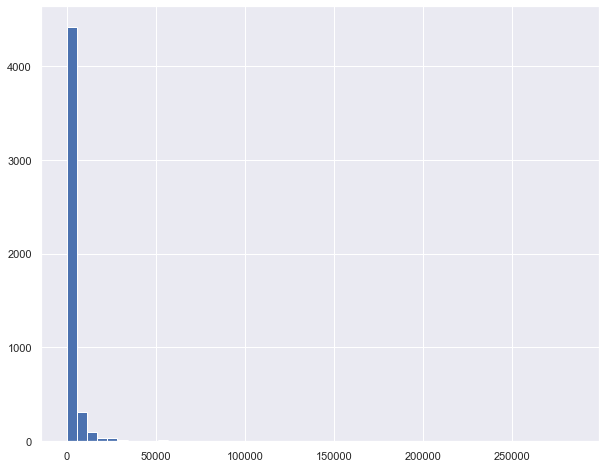

In [45]:
# Посмотрим распределение значений target-переменной
y.hist(bins = 50);

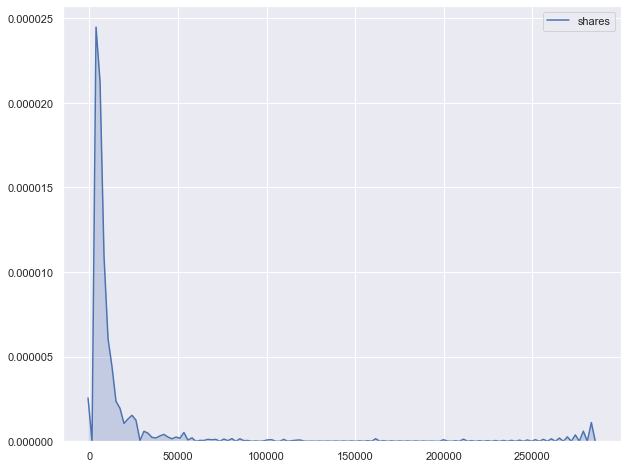

In [46]:
snsplot = sns.kdeplot(df['shares'], shade=True)
fig = snsplot.get_figure()

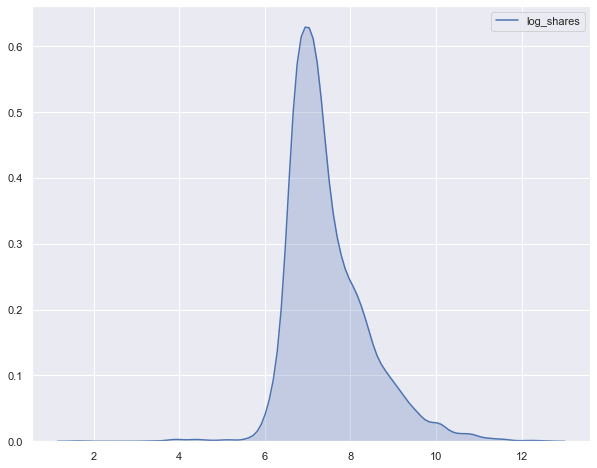

In [47]:
# Видим, что данные имеют ассиметричное распределение, к тому же все числа положительны,
# поэтому попробуем логарифмировать данные
# создадим новый столбец с логарифмированными данными и посмотрим на их распределение
df['log_shares'] = np.log(df['shares'])
snsplot = sns.kdeplot(df['log_shares'], shade=True)
fig = snsplot.get_figure()

In [3]:
#Полученное распределение похоже на нормальное

1.4 Проведите необходимую предобработку данных (preprocessing). Для построения моделей с помощью метрических методов все признаки должны быть закодированы числами.Также может потребоваться масштабирование данных (scaling). Воспользуйтесь
классом StandardScaler библиотеки Scikit-learn.

In [50]:
# Из пункта 1.1 известно что в нашем датасете лишь один не числовой признак - url. Т.к. ссылка для каждой статьи
# уникальна, то url играет роль индекса и не оказывает никакого влияния на модель. Удалим этот столбец.

df1 = df.drop('url', axis = 1)
df1

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
0,101,12,332,0.528481,1.0,0.645833,6,3,1,1,...,0.70,-0.145833,-0.166667,-0.125000,0.718182,0.137121,0.218182,0.137121,8600,9.059517
1,101,10,393,0.518817,1.0,0.596899,14,1,1,0,...,0.80,-0.312500,-0.500000,-0.250000,0.500000,0.000000,0.000000,0.000000,23700,10.073230
2,101,13,1643,0.388854,1.0,0.546967,29,4,7,0,...,0.80,-0.227778,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,8400,9.035987
3,101,9,272,0.488889,1.0,0.512690,2,2,11,0,...,1.00,-0.416667,-1.000000,-0.166667,0.000000,0.000000,0.500000,0.000000,4800,8.476371
4,101,12,0,0.000000,0.0,0.000000,0,0,0,1,...,0.00,0.000000,0.000000,0.000000,0.541071,0.067560,0.041071,0.067560,3100,8.039157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,8,11,346,0.529052,1.0,0.684783,9,7,1,1,...,0.75,-0.260000,-0.500000,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,7.495542
4950,8,12,328,0.696296,1.0,0.885057,9,7,3,48,...,0.70,-0.211111,-0.400000,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,7.549609
4951,8,10,442,0.516355,1.0,0.644128,24,1,12,1,...,0.50,-0.356439,-0.800000,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,7.549609
4952,8,6,682,0.539493,1.0,0.692661,10,1,1,0,...,0.50,-0.205246,-0.500000,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,7.003065


In [51]:
# Теперь удалим признак shares, т.к. у нас есть его логарифмированные значения

df2 = df1.drop('shares', axis=1)
df2.head().T

,0,1,2,3,4
timedelta,101.000000,101.000000,101.000000,101.000000,101.000000
n_tokens_title,12.000000,10.000000,13.000000,9.000000,12.000000
n_tokens_content,332.000000,393.000000,1643.000000,272.000000,0.000000
n_unique_tokens,0.528481,0.518817,0.388854,0.488889,0.000000
n_non_stop_words,1.000000,1.000000,1.000000,1.000000,0.000000
n_non_stop_unique_tokens,0.645833,0.596899,0.546967,0.512690,0.000000
num_hrefs,6.000000,14.000000,29.000000,2.000000,0.000000
num_self_hrefs,3.000000,1.000000,4.000000,2.000000,0.000000
num_imgs,1.000000,1.000000,7.000000,11.000000,0.000000
num_videos,1.000000,0.000000,0.000000,0.000000,1.000000


In [52]:
#выполним масштабирование данных, но вначале разделим наш датасет на таргет и основные данные
df3 = df2.drop('log_shares', axis=1)
y = df2['log_shares'] 
df3.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,101,12,332,0.528481,1.0,0.645833,6,3,1,1,...,0.318697,0.100000,0.7,-0.145833,-0.166667,-0.125000,0.718182,0.137121,0.218182,0.137121
1,101,10,393,0.518817,1.0,0.596899,14,1,1,0,...,0.410268,0.250000,0.8,-0.312500,-0.500000,-0.250000,0.500000,0.000000,0.000000,0.000000
2,101,13,1643,0.388854,1.0,0.546967,29,4,7,0,...,0.303457,0.033333,0.8,-0.227778,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000
3,101,9,272,0.488889,1.0,0.512690,2,2,11,0,...,0.425000,0.100000,1.0,-0.416667,-1.000000,-0.166667,0.000000,0.000000,0.500000,0.000000
4,101,12,0,0.000000,0.0,0.000000,0,0,0,1,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.541071,0.067560,0.041071,0.067560


In [53]:
# Теперь масштабируем данные

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df3)

1.5 Разбейте набор данных на обучающую и валидационную (тестовую) выборки
с помощью метода train_test_split .

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

1.6 Обучите алгоритм классификации kNeighborsClassifier или регрессии
KNeighborsRegressor . Оцените качество каждой модели на валидационной
выборке с помощью
• accuracy_score для классификации;
• mean_squared_error для регрессии.
Сравните результаты и сделайте выводы.

In [55]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 40)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                    weights='uniform')

In [56]:
from sklearn.metrics import mean_squared_error

y_pred = knn.predict(X_valid)
print(y_pred)

[7.47152744 7.49883751 7.00977103 ... 6.92364572 7.13104238 7.97086155]


In [57]:
knn.score(X_valid, y_valid)

0.1056154274007538

In [58]:
mean_squared_error(y_valid, y_pred) # Среднеквадратичная ошибка регрессии.

# Как видим, score очень маленький, а среднеквадратичная ошибка большая 
# Это говорит о том, что наша модель некачественная

0.7036628737356012

2.1 Создайте генератор разбиений, который перемешивает выборку перед создани-
ем блоков ( shuffle=True ). Число блоков n_splits равно 5. Задайте также

параметр random_state для воспроизводимости результатов. Например:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Найдите показатель качества модели kNN на кросс-валидации. Подумайте, при-
емлемо ли использование вашей меры (метрики) качества в данной задаче? При

необходимости пересчитайте качество с помощью другой метрики из списка.

In [59]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [60]:
# Рассмотрим различные метрики
# explained_variance

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=kf, scoring='explained_variance')
np.mean(scores)

# 'cross_val_score' evaluate a score by cross-validation
# And returns array of scores of the estimator for each run of the cross validation.

# Best possible score is 1.0, lower values are worse.
# получили очень маленькое значение относительно хорошего результата, поэтому данная метрика не подходит

0.11786799565294907

In [61]:
# ‘max_error’

scores1 = cross_val_score(knn, X, y, cv=kf, scoring='max_error')
np.mean(scores1)
# Эта метрика не подходит, т.к. получили отрицательное значение

-4.714689702270832

In [62]:
# ‘neg_mean_absolute_error’

scores2 = cross_val_score(knn, X, y, cv=kf, scoring='neg_mean_absolute_error')
np.mean(scores2)
# Эта метрика не подходит, т.к. получили отрицательное значение
# Таким образом, нам подходит только первый вариант

-0.6238963660820163

In [63]:
# Попробуем метрику ‘r2’, т.к. она может принимать и отрицательные значения
# Best possible score is 1.0 and it can be negative 
scores3 = cross_val_score(knn, X, y, cv=kf, scoring='r2')
np.mean(scores3)

# опять получили маленькое значение. Такие результаты на нескольких метриках могут говорить о некачественной модели
# Однако первый и последний варианты самые подходящие по сравнению с остальными

0.10783954355627481

2.2 Осуществите кросс-валидацию модели при числе соседей k ∈ [1;50]. Используй-
те GridSearchCV . При каком k качество получилось наилучшим? Чему равна

эта оценка качества? Постройте график значений метрики в зависимости от k
( matplotlib.pyplot.plot() ).

In [64]:
from sklearn.model_selection import GridSearchCV

knn_params={'n_neighbors': np.arange(1, 51)} # словарь параметров (ключ: набор возможных значений)

knn_grid = GridSearchCV(knn, knn_params, cv=kf, scoring='explained_variance') # кросс-валидация по 5 блокам
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=40, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='explained_variance', verbose=0)

In [65]:
print("Наилучшее качество при", knn_grid.best_params_)
print("Оценка качества равна", knn_grid.best_score_)

# Результат по прежнему не очень хороший

Наилучшее качество при {'n_neighbors': 35}
Оценка качества равна 0.12258071557917707


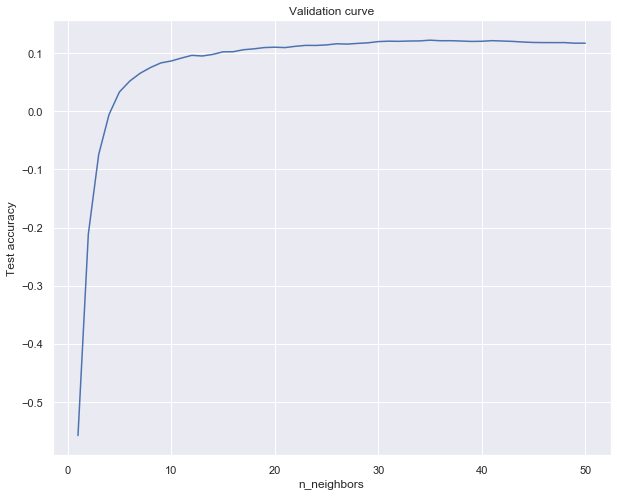

In [66]:
# Рисуем валидационную кривую
# По оси х --- значения гиперпараметров 
# По оси y --- значения метрики 

import matplotlib.pyplot as plt
results_df = pd.DataFrame(knn_grid.cv_results_)
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('n_neighbors')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

# Видно, что при к=35 качество данной модели максимально, а после 35 никак не улучшается.
# А начиная с 10 до 35 улучшается, однако как видно по графику, улучшается не быстро

3.1 Переберите разные варианты значений параметра p по сетке от 1 до 10 с та-
ким шагом, чтобы всего было протестировано 200 вариантов (удобно использо-
вать функцию numpy.linspace ). Используйте KNeighborsClassifier или

KNeighborsRegressor с оптимальным значением n_neighbors , найденным
ранее. Задайте опцию weights='distance' –– данный параметр добавляет
в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве

метрики качества снова используйте accuracy . Качество оценивайте с помо-
щью кросс-валидации по 5 блокам.


3.2 Определите, при каком p качество на кросс-валидации оказалось оптимальным.
Обратите внимание, что cross_val_score возвращает массив показателей
качества по блокам; необходимо максимизировать среднее этих показателей.

In [67]:
knn1 = KNeighborsRegressor(n_neighbors=35, weights='distance', metric='minkowski') #добавим веса
scores_knn = cross_val_score(knn1, X, y, cv=kf, scoring='explained_variance')
print('Массив значений метрики:', scores_knn)
print('Средняя метрика на кросс-валидации:', np.mean(scores_knn))

Массив значений метрики: [0.12029341 0.10741039 0.12236659 0.14352697 0.09924592]
Средняя метрика на кросс-валидации: 0.11856865417448029


In [76]:
from sklearn.model_selection import GridSearchCV
knn_param={'p': np.linspace(1, 10, num=20)} # словарь параметров (ключ: набор возможных значений)

knn_grid1 = GridSearchCV(knn1, knn_param, cv=5, scoring='neg_mean_squared_error') # кросс-валидация по 5 блокам
knn_grid1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=35, p=2,
                                           weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'p': array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [70]:
print("Наилучшая оценка качества модели: ", knn_grid1.best_score_ )

Наилучшая оценка качества модели:  0.1251056703654728


Поэкспериментируйте с другими метрическими методами для задач регрессии и клас-
сификации, представленными в библиотеке Scikit-learn:

• RadiusNeighborsClassifier ;
• RadiusNeighborsRegressor ;
• NearestCentroid

In [75]:
from sklearn.neighbors import RadiusNeighborsRegressor
rnn = RadiusNeighborsRegressor(radius = 50) #берем большой радиус, что у всех точно были соседи и мы не столкнулись с nan
rnn.fit(X_train, y_train)

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, p=2, radius=50,
                         weights='uniform')

In [72]:
y_pred1 = rnn.predict(X_valid)
y_pred1

array([7.46481002, 7.46481002, 7.46481002, ..., 7.46481002, 7.46481002,
       7.46481002])

In [73]:
rnn.score(X_valid, y_valid)
#получили результат еще хуже

-0.0008010031705349974